# PyNNP demo
This notebook provides examples of how to use `pynnp` pcakage for reading, preparing, and analyzing data files generated by [RuNNer](http://www.uni-goettingen.de/de/560580.html) code.

In [1]:
import matplotlib.pylab as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.style.use('bmh')

In [2]:
# load pynnp 
import pynnp as pn

## Read single structres

In [3]:
ra1 = pn.RunnerAdaptor()
ra1.read_runner("input.data.1");

In [4]:
print(ra1)

RunnerAdaptor
-------------
number of samples              : 1
average number of atoms        : 288 
atom types and average numbers : [('H', ' 96'), ('B', ' 72'), ('N', ' 72'), ('O', ' 48')]
range of energies per atom     : 0.00000000
range of forces                : 0.13574615


### Energy

In [5]:
print("Energies:", ra1.energies[0])

Energies: -0.24541136513888887


### Forces

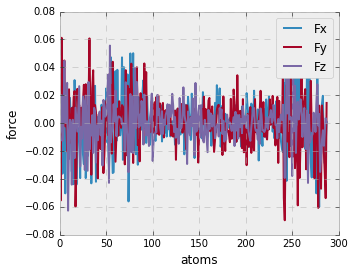

In [6]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(ra1.forces)
plt.xlabel("atoms")
plt.ylabel("force")
plt.legend(['Fx', 'Fy', "Fz"])

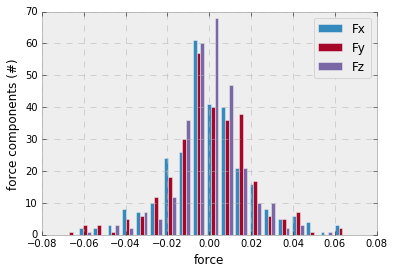

In [8]:
plt.hist(ra1.forces, bins=20)
plt.xlabel("force")
plt.ylabel("force components (#)")
plt.legend(['Fx', 'Fy', "Fz"])

### Number of atom types

Text(0, 0.5, 'average number of atoms')

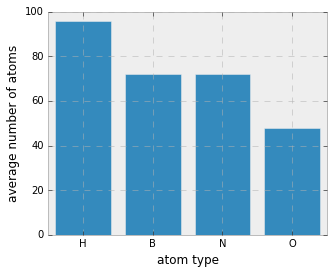

In [9]:
fig, ax = plt.subplots(figsize=(5,4))
atom_data = ra1.dataset.get_atom_types_numbers()
plt.bar(range(len(atom_data)), atom_data.values(), align="center")
plt.xticks(range(len(atom_data)), list(atom_data.keys()));
plt.xlabel("atom type")
plt.ylabel("average number of atoms")

## Read multi structures

In [27]:
# define a unit conersion
uc = pn.UnitConversion(energy_conversion=pn.HARTREE_TO_EV, length_conversion=pn.BOHR_TO_ANGSTROM)

In [28]:
ra500 = pn.RunnerAdaptor()
ra500.read_runner("input.data.500", uc);

In [29]:
print(ra500)

RunnerAdaptor
-------------
number of samples              : 500
average number of atoms        : 288 
atom types and average numbers : [('H', ' 96'), ('B', ' 72'), ('N', ' 72'), ('O', ' 48')]
range of energies per atom     : 0.03601639
range of forces                : 15.83325900


### Energies

Text(0, 0.5, 'energy per atom')

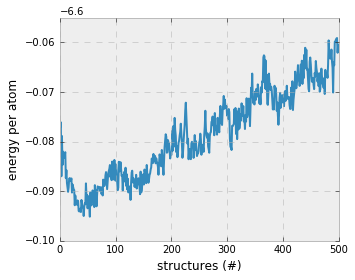

In [30]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(ra500.energies)
plt.xlabel("structures (#)")
plt.ylabel("energy per atom")

### Froces

Text(0, 0.5, 'force components (#)')

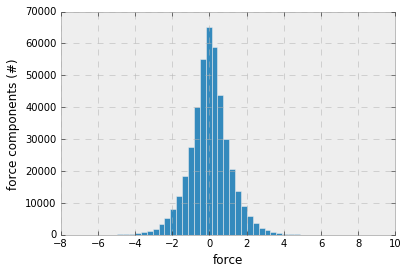

In [31]:
plt.hist(ra500.forces.reshape(-1), bins=50)
plt.xlabel("force")
plt.ylabel("force components (#)")

## Select and Save structures

### Index-based selection

In [46]:
sel1 = pn.RunnerAdaptor().read_runner("input.data.500").select(range(0, 500, 5))  # structures 0-99
sel1.write_runner("input.data.sel")
print(sel1)

RunnerAdaptor
-------------
number of samples              : 100
average number of atoms        : 288 
atom types and average numbers : [('H', ' 96'), ('B', ' 72'), ('N', ' 72'), ('O', ' 48')]
range of energies per atom     : 0.00127350
range of forces                : 0.27571943


### Random selection

In [47]:
sel2 = pn.RunnerAdaptor().read_runner("input.data.500").sample(100) # 100 samples
print(sel2)

RunnerAdaptor
-------------
number of samples              : 100
average number of atoms        : 288 
atom types and average numbers : [('H', ' 96'), ('B', ' 72'), ('N', ' 72'), ('O', ' 48')]
range of energies per atom     : 0.00127738
range of forces                : 0.26506725


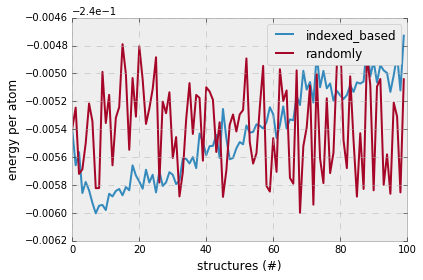

In [51]:
plt.plot(sel1.energies, label="indexed_based")
plt.plot(sel2.energies, label="randomly")
plt.xlabel("structures (#)")
plt.ylabel("energy per atom")
plt.legend()